In [1]:
%load_ext watermark
%watermark -v -p numpy,scipy,sklearn,pandas,matplotlib

CPython 3.8.1
IPython 7.13.0

numpy 1.18.2
scipy 1.4.1
sklearn 0.23.1
pandas 1.0.3
matplotlib 3.2.1


In [2]:
import numpy as np
import pandas as pd

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
iris_pd = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                      columns = iris['feature_names']+['target'])

In [10]:
iris_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 5.9 KB


In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(iris_pd, test_size = 0.2, random_state = 123)

In [15]:
print(train_set.info())
print(test_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 130 to 109
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   petal length (cm)  120 non-null    float64
 3   petal width (cm)   120 non-null    float64
 4   target             120 non-null    float64
dtypes: float64(5)
memory usage: 5.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 72 to 4
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  30 non-null     float64
 1   sepal width (cm)   30 non-null     float64
 2   petal length (cm)  30 non-null     float64
 3   petal width (cm)   30 non-null     float64
 4   target             30 non-null     float64
dtypes: float64(5)
memory usage: 1.4 KB
None


In [16]:
train_set.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
130,7.4,2.8,6.1,1.9,2.0
119,6.0,2.2,5.0,1.5,2.0
29,4.7,3.2,1.6,0.2,0.0
0,5.1,3.5,1.4,0.2,0.0
62,6.0,2.2,4.0,1.0,1.0
93,5.0,2.3,3.3,1.0,1.0
131,7.9,3.8,6.4,2.0,2.0
5,5.4,3.9,1.7,0.4,0.0
16,5.4,3.9,1.3,0.4,0.0
82,5.8,2.7,3.9,1.2,1.0


In [17]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
tree_clf2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
tree_clf3 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
tree_clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
tree_clf_gini2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
tree_clf_gini3 = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)


In [18]:
features = list(train_set.columns[:-1])
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
X = train_set[features]
y = train_set['target']

In [20]:
tree_clf.fit(X,y)
tree_clf2.fit(X,y)
tree_clf3.fit(X,y)
tree_clf_gini.fit(X,y)
tree_clf_gini2.fit(X,y)
tree_clf_gini3.fit(X,y)

DecisionTreeClassifier(max_depth=4)

In [25]:
from sklearn.tree import export_graphviz

name_list = ['iris_tree.dot','iris_tree2.dot','iris_tree3.dot','iris_tree_gini1.dot','iris_tree_gini2.dot','iris_tree_gini3.dot']
tree_list = [tree_clf,tree_clf2,tree_clf3,tree_clf_gini,tree_clf_gini2,tree_clf_gini3]

#  tree_clf    == >   "entropy" , max_depth = 2 
#  tree_clf2   == >   "entropy" , max_depth = 3 
#  tree_clf3   == >   "entropy" , max_depth = 4 

#  tree_clf_gini    == >   "gini" , max_depth = 2 
#  tree_clf_gini2   == >   "gini" , max_depth = 3 
#  tree_clf_gini3   == >   "gini" , max_depth = 4 

for i in range(0,6):
    export_graphviz(
        tree_list[i],
        out_file = name_list[i],
        feature_names = features,
        rounded = True,
        filled = True)


iris_tree.dot ------------------------------------------------------


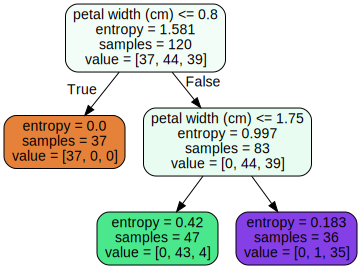

iris_tree2.dot ------------------------------------------------------


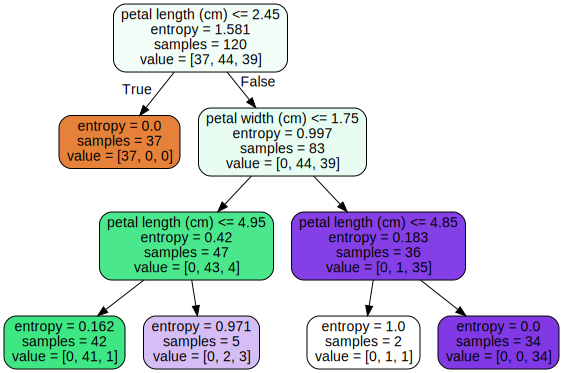

iris_tree3.dot ------------------------------------------------------


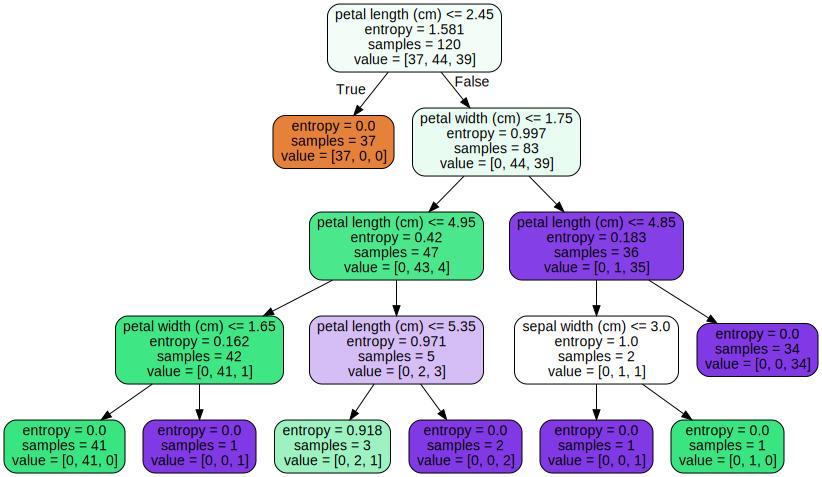

iris_tree_gini1.dot ------------------------------------------------------


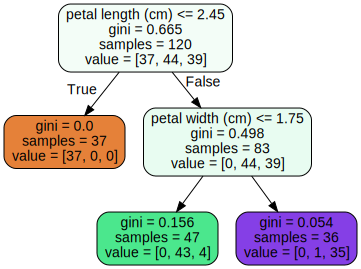

iris_tree_gini2.dot ------------------------------------------------------


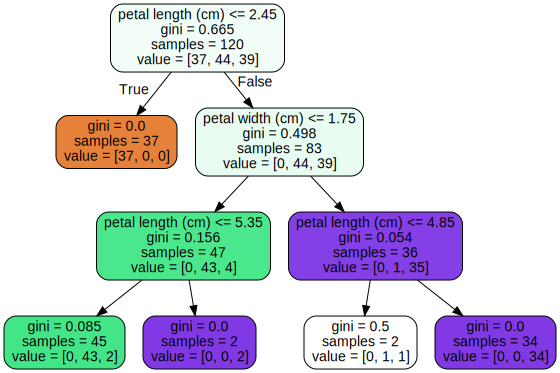

iris_tree_gini3.dot ------------------------------------------------------


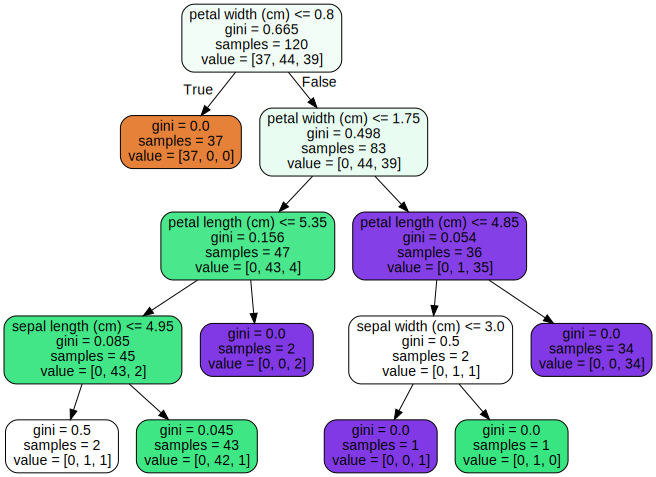

In [26]:
import graphviz
from IPython.display import display

name_list = ['iris_tree.dot','iris_tree2.dot','iris_tree3.dot','iris_tree_gini1.dot','iris_tree_gini2.dot','iris_tree_gini3.dot']
for f_name in name_list:
    with open(f_name) as f:
        dot_graph = f.read()
    dot = graphviz.Source(dot_graph)
    dot.format = 'png'
    dot.render(filename = f_name, directory = './', cleanup=True)
    print(f_name, "------------------------------------------------------")
    display(dot)

In [29]:
X_test = test_set[features]
y_test = test_set['target']

In [30]:
#entropy
y_pred = tree_clf.predict(X_test)
y1_pred = tree_clf2.predict(X_test)
y2_pred = tree_clf3.predict(X_test)

#gini
y3_pred = tree_clf_gini.predict(X_test)
y4_pred = tree_clf_gini2.predict(X_test)
y5_pred = tree_clf_gini3.predict(X_test)

y_list = [y_pred, y1_pred, y2_pred, y3_pred, y4_pred, y5_pred]

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

for pred in y_list:
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test,pred))

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.86      1.00      0.92         6
         2.0       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.86      1.00      0.92         6
         2.0       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0      

# 과제 결과
  
<span style="color:red"> **1. DecisionTreeClassifier 함수의 entropy는 무엇인가?** </span>
  
=> entropy : 열역학에서 많이 쓰이는 개념으로 무질서에 대한 측도 역할을 하며, 여기서는 
   decision tree안 node의 impurity를 측정하는데 사용된다. 아래의 공식은 entorpy에 대한 공식을 나타내고 있다.  
   또한, entropy가 높을수록 노드의 impurity는 높은 것이며  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;entropy가 낮을수록 노드의 impurity는 낮은 것이다.  
  


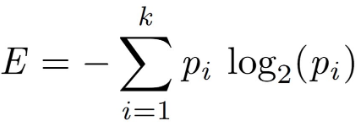

In [42]:
from IPython.display import Image

Image("./entropy.PNG")

k : 서로 다른 class의 수 (범주의 수)  
P(i) : i번째 class 에 대한 확률


예를 들어 클래스가 2가지 경우로 이루어진 binary set (A,B) 일 때, 노드에  
A,B가 각각 0 : 100 으로 있는 경우 entropy = 0 이 된다. 

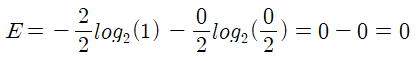

In [43]:
from IPython.display import Image
Image("./log2.PNG")

A,B가 각각 50 : 50 으로 있는 경우 entropy = 1 (maximum 값)이 된다.

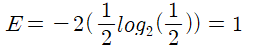

In [44]:
from IPython.display import Image
Image("./log1.PNG")


A,B가 각각 100 : 0 으로 있는 경우 entropy = 0 이 된다.
이렇게 entropy를 계산함으로써 아래와 같은 그래프를 얻을 수 있다.

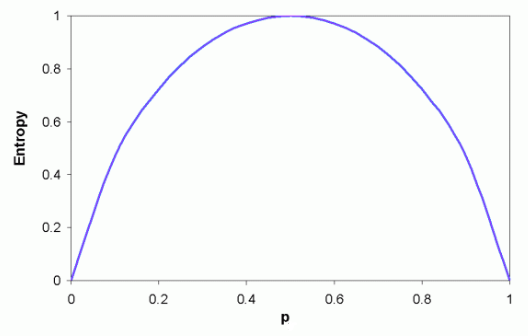

In [45]:
from IPython.display import Image

Image("./entropy_graph.PNG")

<span style="color:red"> **2. DecisionTreeClassifier 함수의 max_depth는 무엇인가?** </span> 
  
=> max_depth : decisiont tree 에서 max_depth를 설정하지 않거나, 너무 크게 설정하면 decistion tree는 끊임없이 밑으로 가지를 뻗어갈 수 있다 혹은 가지를 필요이상으로 과하게 뻗어나갈 것이다. 또한 트리가 계속적으로 뻗어가다 보면 모든 leaf node가 impurity가 0인 즉, 순도가 100% 상태로 만들어진다. 이로 인해 train_set에 대해서는 과하게 학습하여 좋은 결과를 내지만, test_set에 대해서는 나쁜 결과를 내는 상황이 발생한다. 이러한 상황을 "Overfitting"이라고 하며, 이를 피하기 위해서 최대 깊이(max_depth)를 지정해 줄 수 있다.  
  
결론 : max_depth를 설정함으로써 decision tree의 깊이는 max_depth 까지로 제한되며 이를 통해 "Overfitting"이라는 현상을 피할 수 있다. 그러나 max_depth를 너무 크게 설정하여도 "overfitting"현상이 발샏할 수 있고, 이와 반대로 너무 작게 설정하면 효율이 크게 떨어질 수 있기 때문에 max_depth를 적절한 크기로 설정해주는 것이 중요하다.

<span style="color:red"> **3. iris데이터에 대해서 위와 똑같은 예제를 실행해 보시오.** </span>  
결과를 알아보기에 앞서 gini라는 것에 대해 먼저 알아보아야 한다.  
gini : entropy와 마찬가지로 decision tree안 노드의 impurity를 측정하는데 사용되며 공식은 다음과 같다.  

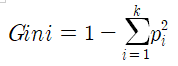

In [46]:
from IPython.display import Image
Image("./gini_.PNG")

gini의 경우에도 binary set (A,B) 에 대해 A,B 가 동등하게 50:50 으로 있을 경우 최대의 impurity를 가진다고 할 수 있다. 그러나 entropy에 비해 gini는 log연산을 따로 취하지 않으므로 계산속도가 조금 빠르다는 장점이 있다. 
  
이러한 결과를 바탕으로 그래프를 그려 entropy와 gini를 비교하였을 때, 아래의 그림과 같은 모습을 볼 수 있다. ( 비교를 위해 entropy의 규모를 1/2로 설정 하였다. ) 

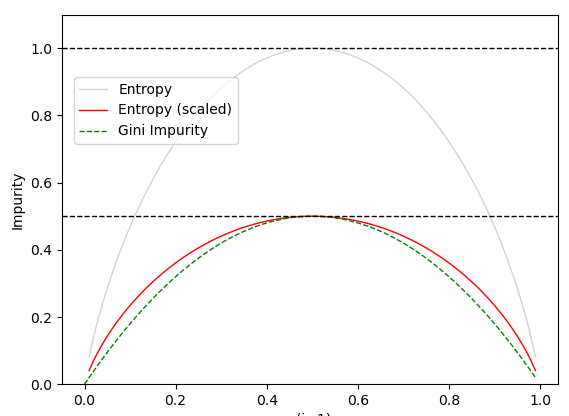

In [47]:
from IPython.display import Image
Image("./gini.PNG")

위의 그래프를 보면 entropy 와 gini는 impurity 측정에 관해서 매우 유사하다는 것을 확인 확인할 수 있다. 이제 이러한 사실을 바탕으로 "iris dataset"에 관한 결과를 비교해보자

## < 결과 비교 >

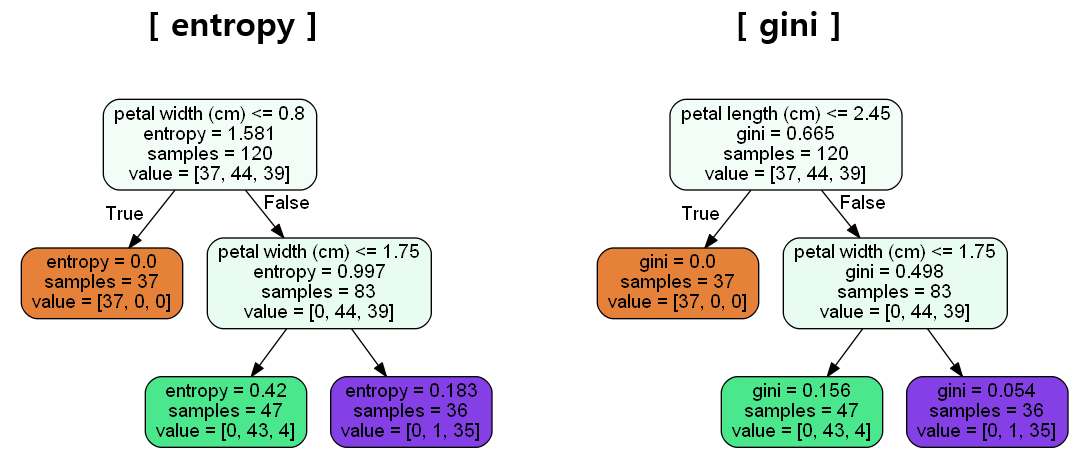

In [48]:
from IPython.display import Image
Image("./compare_result1.PNG")

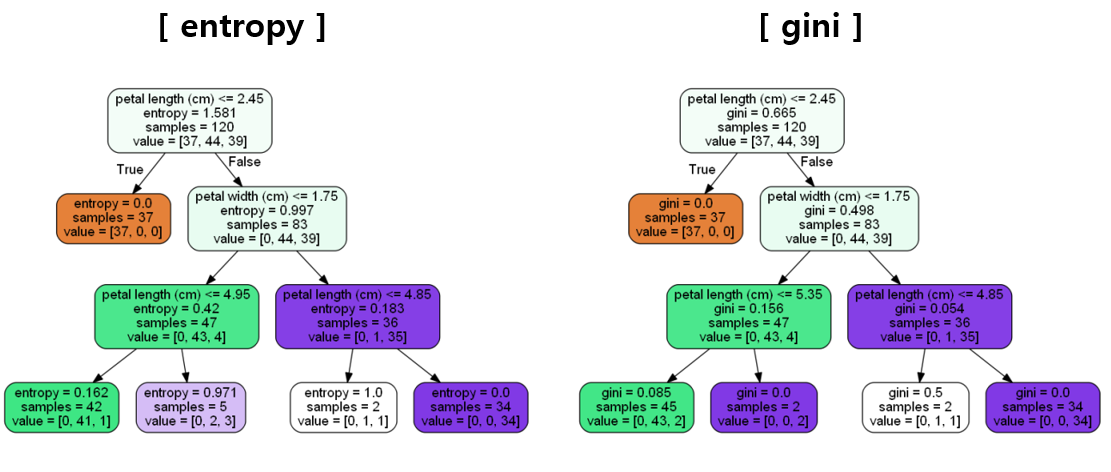

In [49]:
from IPython.display import Image
Image("./compare_result2.PNG")

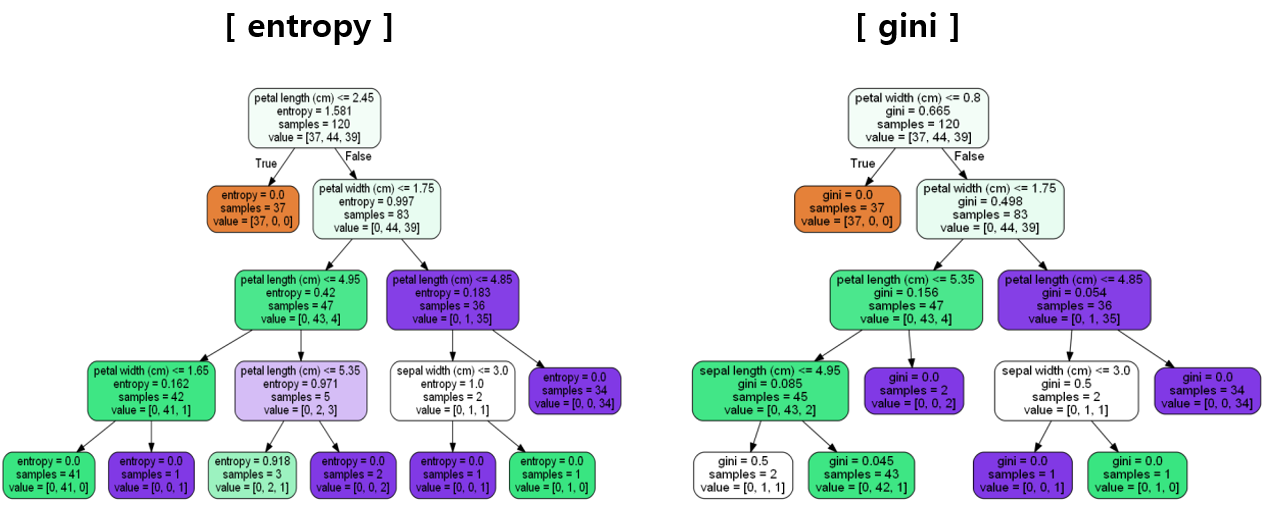

In [50]:
from IPython.display import Image
Image("./compare_result3.PNG")

위의 그림은 criterion을 각각 entropy 와 gini로 설정하였을 경우, 형성된 decision tree를 모아놓은 것이다.(노드의 색을 통해 서로 다른 클래스를 표현하였다.)
  
max_depth = 2  와 max_depth = 3 의 경우 entropy와 gini 모두 비슷한 형태의 decision tree를 형성하고 있고,  
max_depth = 4의 경우에는 조금의 차이가 있었다. entropy 와 gini를 이용해서 형성된 decision tree의 모습이 조금 달랐으며, 이를 통해 entropy 와 gini를 criterion으로 각각 설정하였을 경우, 무조건 같은 형태의 decision tree를 구성하는 것이 아니며, 트리의 모양이 다를 수 있음을 확인하였다. 그러나 leaf node에 조금의 차이를 제외하면 두 decision tree가 비슷한 형태를 띄고 있는 것도 알 수 있었다.  

마지막으로 criterion 이 entropy인 경우 와 gini인 경우 2가지 경우 모두 max_depth가 증가함에 따라 leaf_node에 해당하는 노드의 sample의 갯수가 점점 줄어드는 모습을 볼 수 있었다.  
  
이번엔 이러한 decision tree를 바탕으로 예측한 결과가 얼마나 일치하는지, 그리고 그에대한 성능평가표 들을 비교해보자.

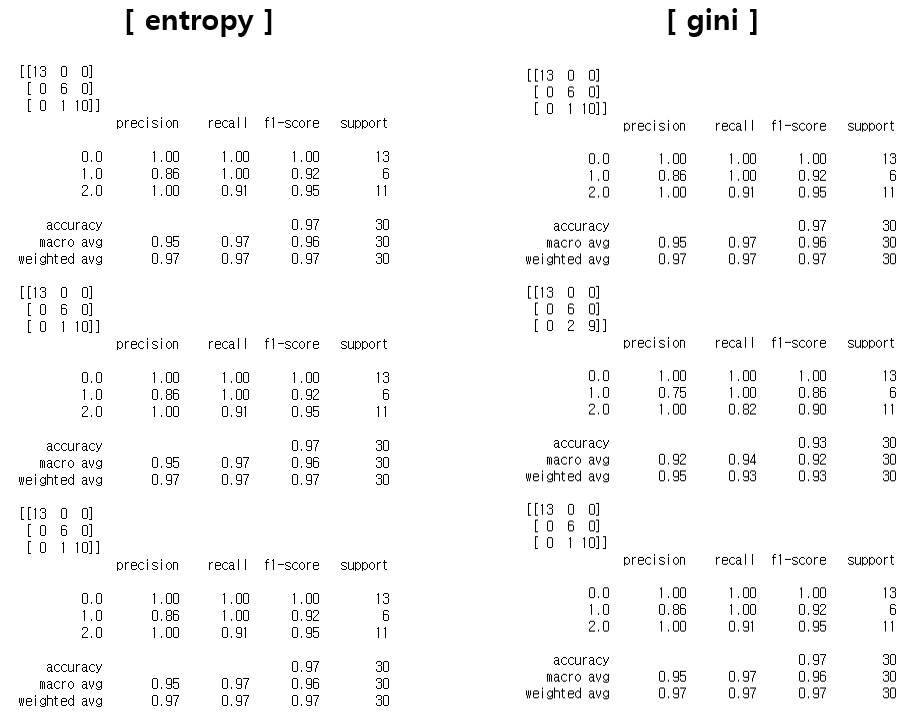

In [51]:
from IPython.display import Image
Image("./compare_result4.PNG")

위의 그림에서 각각의 표의 왼쪽 상단에 존재하는 matrix는 모형이 예측한 답과 타겟의 답이 얼마나 일치하는지를 보여주는 지를 행렬로 나타낸 것이며, 그 밑의 표는 모형의 성능을 나타내주는 표이다.  

위의 그림을 보면 entropy 와 gini를 criterion으로 설정했을 경우,  
예측한 답과 타겟의 답이 일치하거나 미세하게 다른 모습을 볼 수 있다.  
또한, 성능을 평가한 표를 보아도 entropy와 gini에 대해 크게 차이가 없음을 확인할 수 있다.


결론 : entropy와 gini 모두 decision tree에서 root,decision node에서 좋은 split point를 선택하는데 도움을 준다. 결국 이를 바탕으로 information gain을 구하고, 가장 큰 information gain을 얻은 features을 구하여 split point로 사용할 수 있다. 이렇게 impurity가 가장 낮은 방향을 찾아서 가다보면 최종 decision tree를 형성할 수 있다.
(적절한 max_depth가 주어진 상황에서)